In [109]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [110]:
df=pd.read_csv('marketing.csv')
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


In [114]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [116]:
df.shape

(2205, 39)

In [117]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


# Data cleaning

In [118]:
df.isna().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [119]:
df.duplicated().sum()

184

In [120]:
df.drop_duplicates(keep=False, inplace=True)

In [121]:
df.duplicated().sum()

0

#  Data preprocessing 

In [122]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [123]:
df['marital_Married']=df['marital_Married'].astype(str).replace({'1':'5','0':''})
df['marital_Single']=df['marital_Single'].astype(str).replace({'1':'4','0':''})
df['marital_Together']=df['marital_Together'].astype(str).replace({'1':'3','0':''})
df['marital_Widow']=df['marital_Widow'].astype(str).replace({'1':'2','0':''})
df['marital_Divorced']=df['marital_Divorced'].astype(str).replace({'0':''})
df['marital_status']=df['marital_Widow']+df['marital_Together']+df['marital_Single']+df['marital_Married']+df['marital_Divorced']
df['marital_status']=df['marital_status'].map({'1':'Divorced', '2':'Widow','3':'Together','4':'Single','5':'Married'})
df['education_2n Cycle']=df['education_2n Cycle'].astype(str).replace({'0':''})
df['education_Basic']=df['education_Basic'].astype(str).replace({'1':'2','0':''})
df['education_Graduation']=df['education_Graduation'].astype(str).replace({'1':'3','0':''})
df['education_Master']=df['education_Master'].astype(str).replace({'1':'4','0':''})
df['education_PhD']=df['education_PhD'].astype(str).replace({'1':'5','0':''})
df['education_level']=df['education_2n Cycle']+df['education_Basic']+df['education_Graduation']+df['education_Master']+df['education_PhD']
df['education_level']=df['education_level'].map({'1':'2n Cycle','2':'Basic','3':'Graduation','4':'Master','5':'PhD'})
df


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level
0,58138.0,0,0,58,635,88,546,172,88,88,...,,,3,,,1529,1441,0,Single,Graduation
1,46344.0,1,1,38,11,1,6,2,1,6,...,,,3,,,21,15,0,Single,Graduation
2,71613.0,0,0,26,426,49,127,111,21,42,...,,,3,,,734,692,0,Together,Graduation
3,26646.0,1,0,26,11,4,20,10,3,5,...,,,3,,,48,43,0,Together,Graduation
4,58293.0,1,0,94,173,43,118,46,27,15,...,,,,,5,407,392,0,Married,PhD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,26816.0,0,0,50,5,1,6,3,4,3,...,,,3,,,19,16,0,Single,Graduation
2200,61223.0,0,1,46,709,43,182,42,118,247,...,,,3,,,1094,847,0,Married,Graduation
2202,56981.0,0,0,91,908,48,217,32,12,24,...,,,3,,,1217,1193,1,Divorced,Graduation
2203,69245.0,0,1,8,428,30,214,80,30,61,...,,,,4,,782,721,0,Together,Master


In [125]:
df['kids']=df['Kidhome']+df['Teenhome']
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids
0,58138.0,0,0,58,635,88,546,172,88,88,...,,3,,,1529,1441,0,Single,Graduation,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,,3,,,21,15,0,Single,Graduation,2
2,71613.0,0,0,26,426,49,127,111,21,42,...,,3,,,734,692,0,Together,Graduation,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,,3,,,48,43,0,Together,Graduation,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,,,,5,407,392,0,Married,PhD,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,26816.0,0,0,50,5,1,6,3,4,3,...,,3,,,19,16,0,Single,Graduation,0
2200,61223.0,0,1,46,709,43,182,42,118,247,...,,3,,,1094,847,0,Married,Graduation,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,,3,,,1217,1193,1,Divorced,Graduation,0
2203,69245.0,0,1,8,428,30,214,80,30,61,...,,,4,,782,721,0,Together,Master,1


In [126]:
data=df.drop(['marital_Divorced','marital_Married','marital_Single','marital_Together','marital_Widow','education_2n Cycle','education_Basic','education_Graduation','education_Master','education_PhD','Kidhome','Teenhome'],axis=1)
data


,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Z_Revenue,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids
0,58138.0,58,635,88,546,172,88,88,3,8,...,11,1,63,2822,1529,1441,0,Single,Graduation,0
1,46344.0,38,11,1,6,2,1,6,2,1,...,11,0,66,2272,21,15,0,Single,Graduation,2
2,71613.0,26,426,49,127,111,21,42,1,8,...,11,0,55,2471,734,692,0,Together,Graduation,0
3,26646.0,26,11,4,20,10,3,5,2,2,...,11,0,36,2298,48,43,0,Together,Graduation,1
4,58293.0,94,173,43,118,46,27,15,5,5,...,11,0,39,2320,407,392,0,Married,PhD,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,26816.0,50,5,1,6,3,4,3,1,0,...,11,0,34,2840,19,16,0,Single,Graduation,0
2200,61223.0,46,709,43,182,42,118,247,2,9,...,11,0,53,2540,1094,847,0,Married,Graduation,1
2202,56981.0,91,908,48,217,32,12,24,1,2,...,11,0,39,2314,1217,1193,1,Divorced,Graduation,0
2203,69245.0,8,428,30,214,80,30,61,2,6,...,11,0,64,2315,782,721,0,Together,Master,1


<AxesSubplot:xlabel='education_level', ylabel='count'>

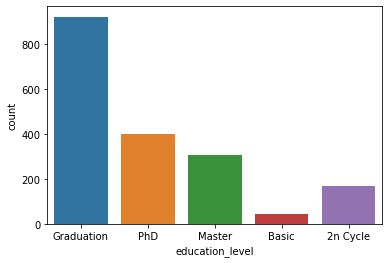

In [127]:
sns.countplot(x="education_level", data=data)



<AxesSubplot:xlabel='marital_status', ylabel='count'>

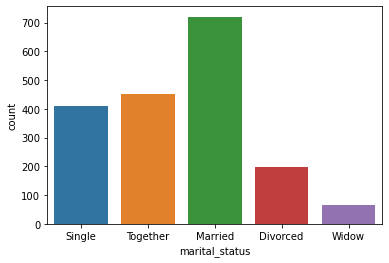

In [128]:
sns.countplot(x="marital_status",data=data)

(array([ 26.,  43., 115., 167., 224., 207., 195., 214., 202., 189., 173.,
         61.,  22.,   4.,   1.]),
 array([  1730.        ,   9196.93333333,  16663.86666667,  24130.8       ,
         31597.73333333,  39064.66666667,  46531.6       ,  53998.53333333,
         61465.46666667,  68932.4       ,  76399.33333333,  83866.26666667,
         91333.2       ,  98800.13333333, 106267.06666667, 113734.        ]),
 <BarContainer object of 15 artists>)

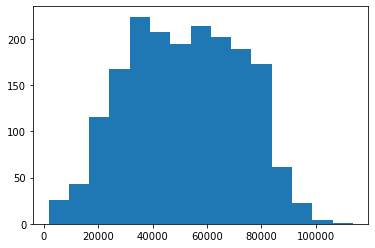

In [129]:
plt.hist(data['Income'],bins=15)

<AxesSubplot:xlabel='kids', ylabel='Income'>

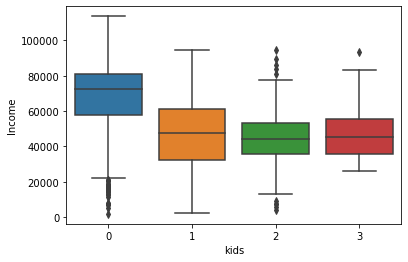

In [130]:
sns.boxplot(y=data['Income'],x=data['kids'])

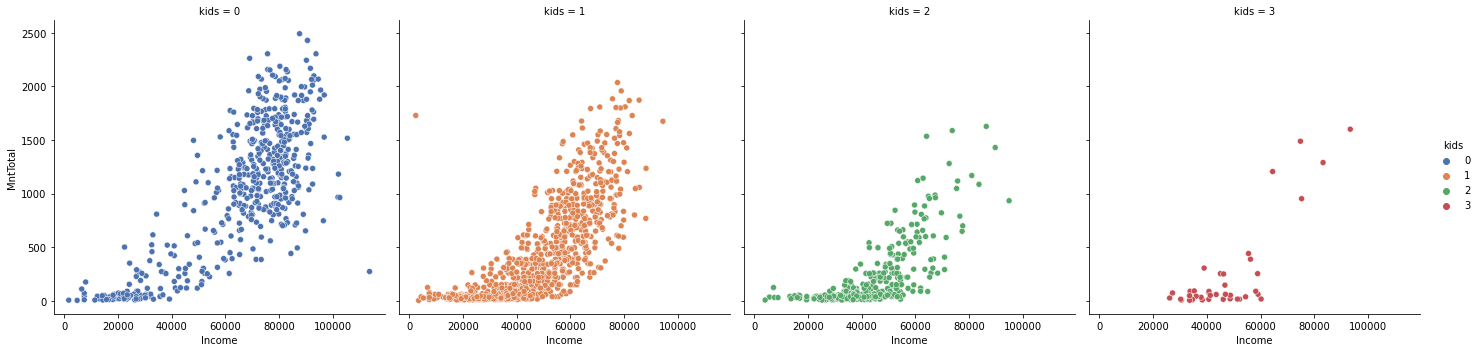

In [131]:
sns.relplot(x="Income", y="MntTotal", data=data, col="kids",hue="kids", kind="scatter",palette="deep")

C:\Users\najat\AppData\Local\Temp/ipykernel_11372/4201313505.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  expenses=data.groupby(['kids'])['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts'].mean().unstack().reset_index(name='Total').rename(columns={'level_0': 'expense_type'})


[]

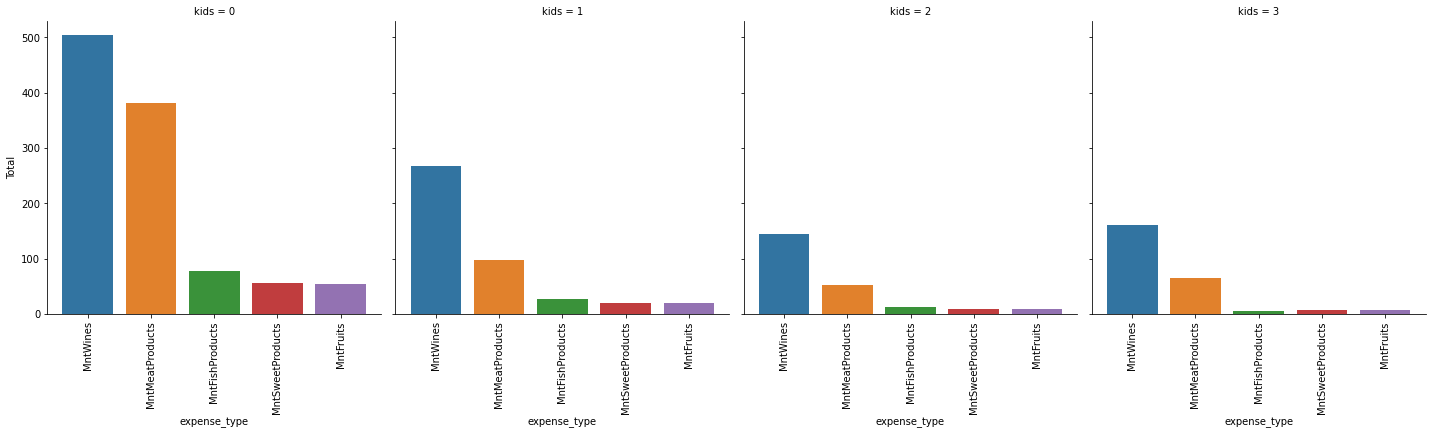

In [135]:
expenses=data.groupby(['kids'])['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts'].mean().unstack().reset_index(name='Total').rename(columns={'level_0': 'expense_type'})
chart=sns.catplot(data=expenses.sort_values(by="Total",ascending=False),x="expense_type",y="Total",kind="bar",legend=True, col="kids")
chart.set_xticklabels(rotation=90)
plt.plot()

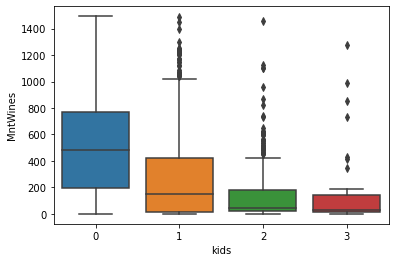

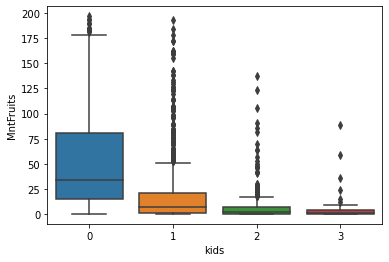

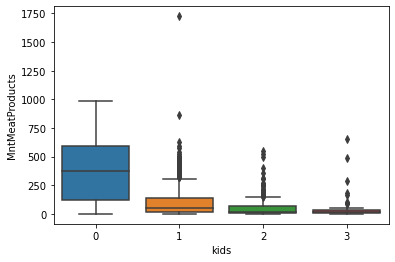

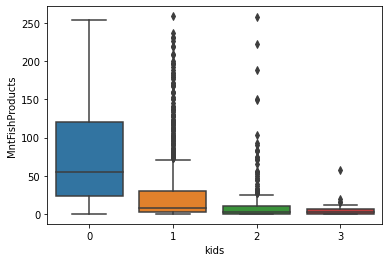

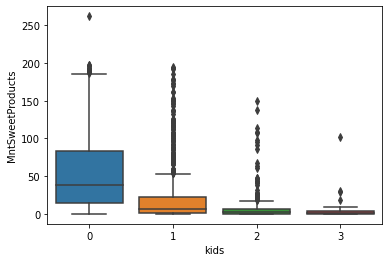

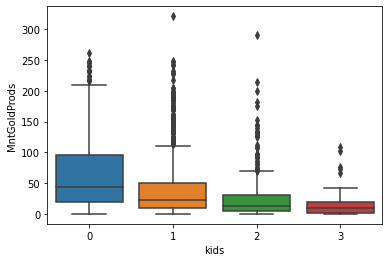

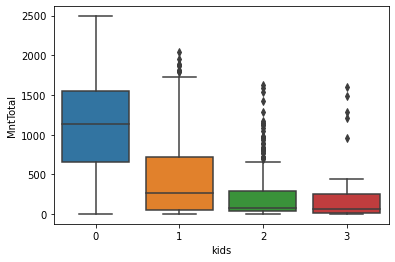

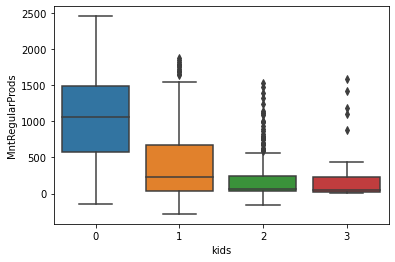

In [138]:
for col in data.columns:
    if 'Mnt' in col:
        sns.boxplot(x='kids',y=col ,data=data)
        plt.show()

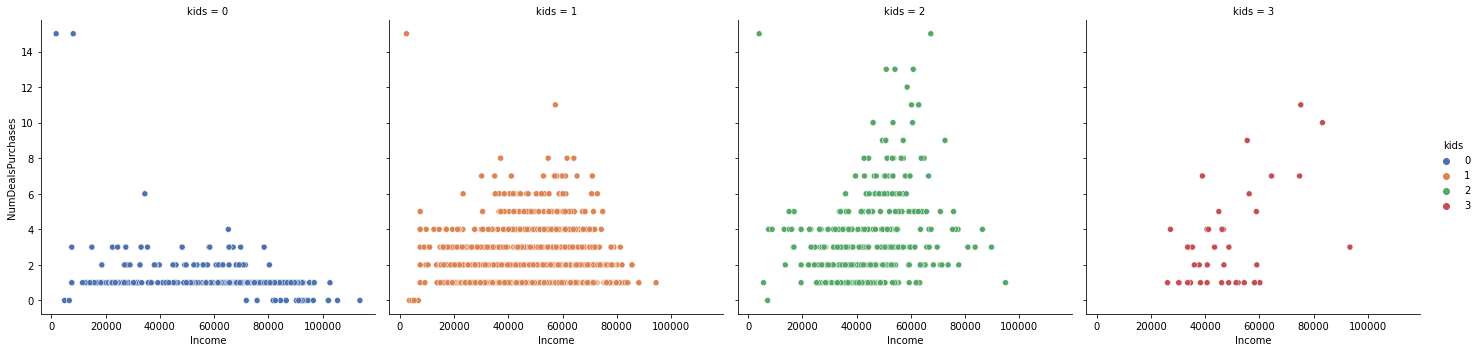

In [139]:
sns.relplot(data=data, x="Income", y="NumDealsPurchases", col="kids", hue="kids",palette="deep")
plt.show()

<AxesSubplot:>

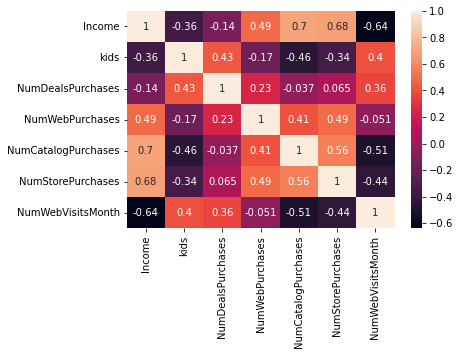

In [143]:
c=data[['Income','kids','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']].corr()
sns.heatmap(c,annot=True)

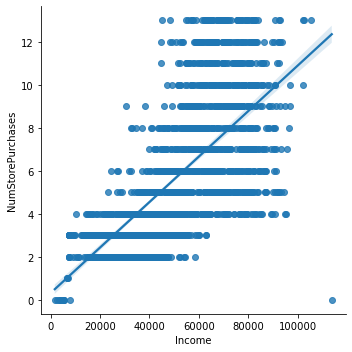

In [144]:
sns.lmplot(data=data, x="Income", y="NumStorePurchases")
plt.show()

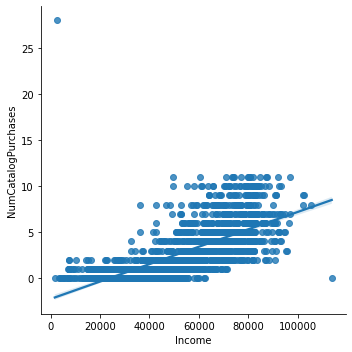

In [145]:
sns.lmplot(data=data, x="Income", y="NumCatalogPurchases")
plt.show()

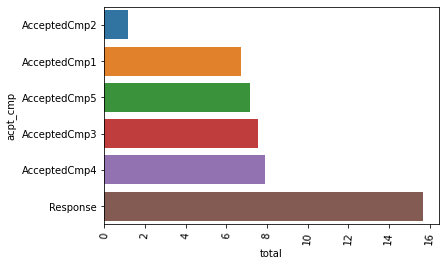

In [146]:
cmp_success=((data[["AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2", "Response"]].sum(axis=0)/ data[["AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2","Response"]].count(axis=0))*100).round(2).reset_index(name="total").rename(columns={'index':'acpt_cmp'}).sort_values(by="total")
sns.barplot(x="total", y="acpt_cmp", data=cmp_success)
plt.xticks(rotation=85)
plt.show()

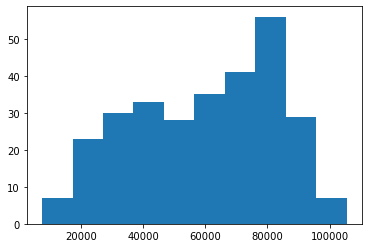

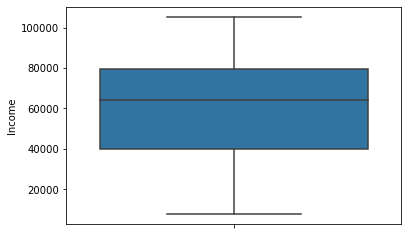

In [148]:
plt.hist(data[data["Response"]==1]["Income"])
plt.show()

sns.boxplot(y=data[data["Response"]==1]["Income"])
plt.show()

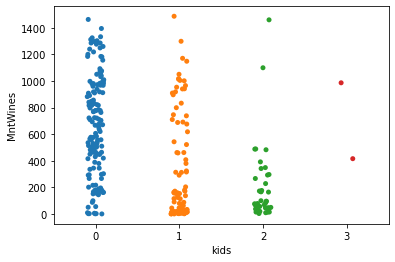

In [149]:
sns.stripplot(y=data[data["Response"]==1]["MntWines"], x=data[data["Response"]==1]["kids"])
plt.show()

(array([ 35., 139., 174., 353., 317., 245., 234., 204., 121.,  21.]),
 array([24. , 29.6, 35.2, 40.8, 46.4, 52. , 57.6, 63.2, 68.8, 74.4, 80. ]),
 <BarContainer object of 10 artists>)

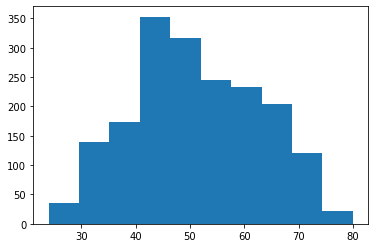

In [150]:
plt.hist(data=data, x="Age")